# Credit Card Fraud Detection


### Todo:
1. Show the splits of the features


## 1. Introduction

### Motivation/Background
In today's digital age, credit card transactions have become a daily routine for billions of people worldwide. However, this convenience also comes with a significant risk: credit card fraud. Credit card fraud can lead to substantial financial losses for both consumers and financial institutions and damage customer trust. It is imperative for credit card companies to deploy effective systems that can detect and prevent fraudulent transactions in real-time, ensuring the security of their customers' transactions and maintaining their trust in electronic payment systems.

### Problem Setting
The problem of credit card fraud detection is essentially a binary classification task, where the aim is to accurately identify whether a given transaction is fraudulent or legitimate. This task is challenging due to the sophisticated tactics employed by fraudsters, the evolving nature of fraud, and the inherent imbalance in transaction datasets—where fraudulent transactions are significantly outnumbered by legitimate ones. Effective detection models must be highly sensitive to the minority class (fraudulent transactions) while maintaining a low rate of false positives to avoid inconveniencing customers with legitimate transactions.

## 2. Dataset Description

### Context
The ability to recognize fraudulent credit card transactions is crucial for credit card companies, ensuring that customers are not charged for items they did not purchase. This project utilizes a dataset consisting of transactions made by European cardholders in September 2013, focusing on identifying fraudulent activities.

### Content
The dataset, titled `creditcard.csv`, captures transactions over two days in September 2013, comprising 284,807 transactions, of which 492 are frauds. The dataset is notably unbalanced, with the fraudulent transactions (the positive class) accounting for only 0.172% of all transactions. This characteristic presents a unique challenge in fraud detection, emphasizing the need for models that can effectively detect the minority class.

The dataset comprises numerical input variables from V1 to V28, which are the principal components obtained through PCA transformation, except for 'Time' and 'Amount'. The 'Time' feature represents the seconds elapsed between each transaction and the first transaction in the dataset. The 'Amount' feature indicates the transaction amount. These features, along with the principal components, provide a transformed representation of the transactions, devoid of original features for confidentiality reasons.

Feature 'Class' is the response variable, indicating the transaction status: 1 in the case of fraud and 0 otherwise.

Given the dataset's imbalance, traditional accuracy metrics may not provide a true representation of a model's performance. Instead, we will focus on the Area Under the Precision-Recall Curve (AUPRC) as a more indicative measure of our model's ability to detect fraud.

### Preprocessing
Before diving into model building, the dataset undergoes several preprocessing steps to ensure optimal performance. These steps include handling missing values, if any, and scaling features, particularly 'Time' and 'Amount', to normalize their range and improve model accuracy. The specifics of these preprocessing steps will be outlined in the subsequent sections.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/creditcard.csv')

print('Length of Data: ', len(df))
# Display the first few rows of the dataset
print(df.head())

# Basic information about the dataset
print(df.info())

# Descriptive statistics
print(df.describe())

# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Length of Data:  284807
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        

## 3. Exploratory Data Analysis (EDA)

### Distribution of Features

To gain deeper insights into our dataset, it's crucial to visualize the distribution of each feature. Understanding these distributions helps us identify any potential irregularities, such as skewness or outliers, which could impact the performance of our machine learning model. For each feature, we plot a histogram overlaid with a kernel density estimate (KDE) to observe its distribution shape. Additionally, we mark the mean and median on these plots:

- **Histogram**: Offers a visual summary of the frequency distribution of a dataset. Each bar represents the frequency (number of transactions) within a specific range of values.
- **Kernel Density Estimate (KDE)**: Provides a smooth curve that gives a more continuous estimation of the distribution shape. It's useful for identifying the distribution's modality (i.e., whether it's unimodal, bimodal, etc.).
- **Mean (Red Dashed Line)**: Represents the average value of the feature across all transactions. It's a measure of central tendency.
- **Median (Green Solid Line)**: Denotes the middle value when the feature's values are arranged in ascending order. Unlike the mean, the median is not affected by extreme outliers and thus provides a better central tendency measure for skewed distributions.

By examining these plots, we can make informed decisions on further preprocessing steps, such as normalization or transformation, to improve our model's accuracy. Furthermore, understanding feature distributions is essential for feature engineering, where we may decide to create new features based on the existing ones' characteristics.

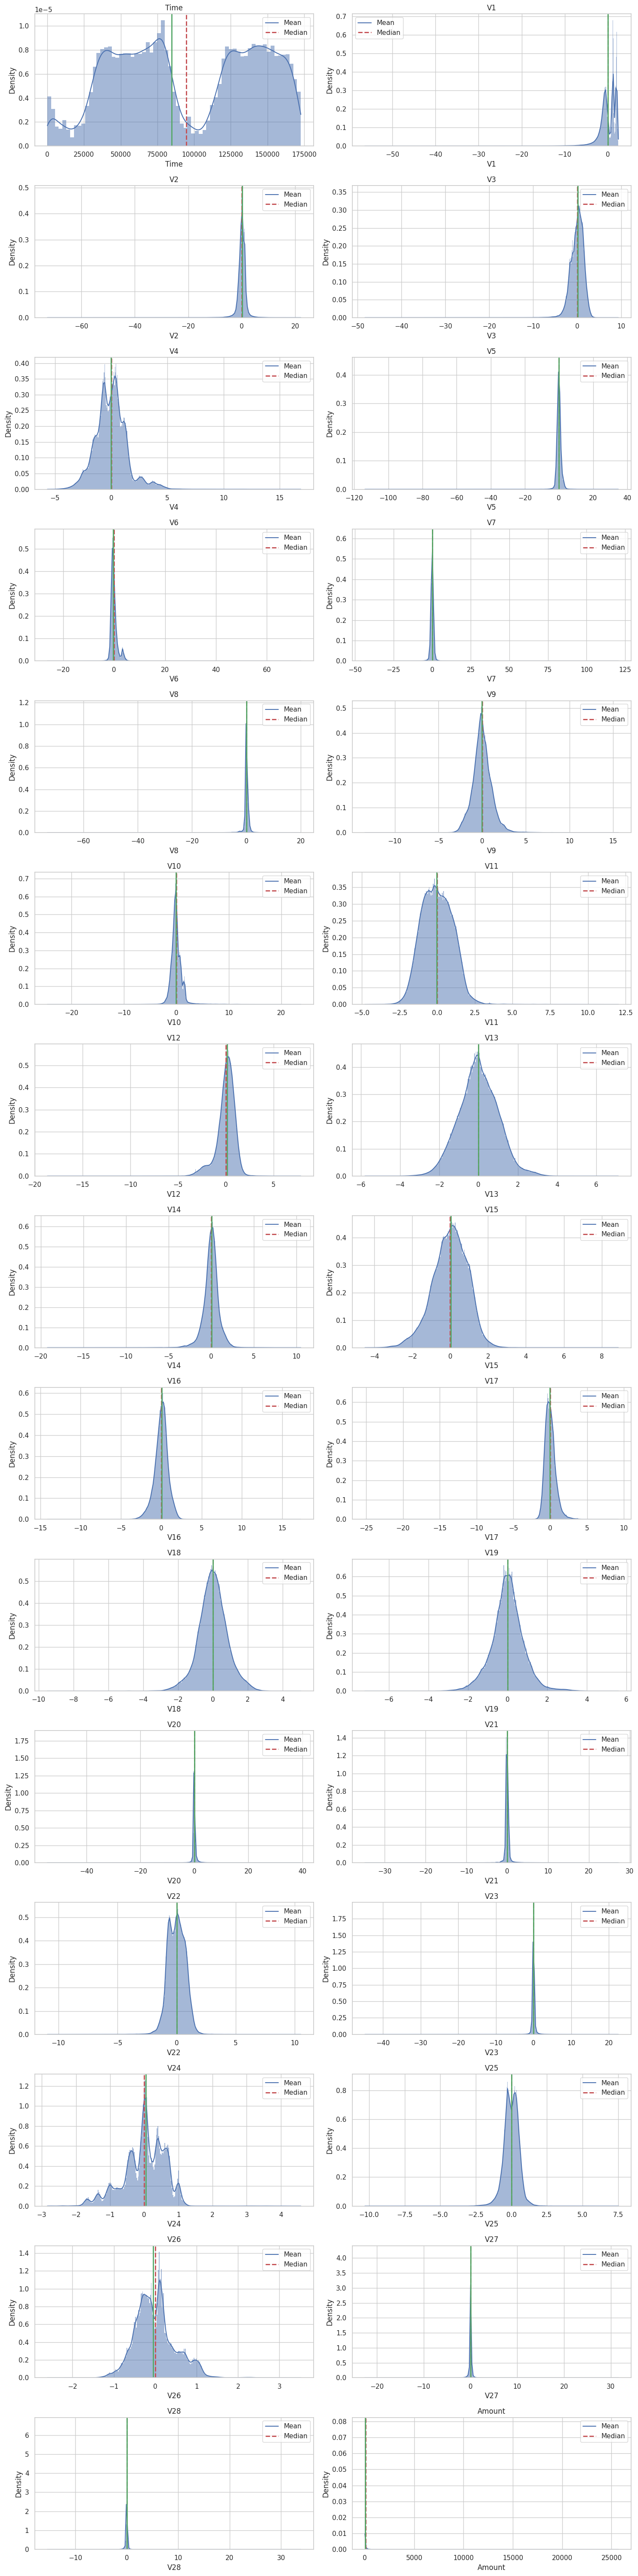

In [5]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Selecting only the features for plotting (excluding 'Time', 'Amount', and 'Class')
features = df.iloc[:, :-1].columns

# Number of rows and columns for subplot grid
n_rows = (len(features) + 1) // 2
n_cols = 2

# Create a figure object
plt.figure(figsize=(15, 4 * n_rows))

# Looping through the features to create subplots
for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[feature], kde=True, stat="density", linewidth=0)

    # Calculating mean and median
    mean_value = df[feature].mean()
    median_value = df[feature].median()

    # Plotting mean and median lines
    plt.axvline(mean_value, color='r', linestyle='--', linewidth=2)
    plt.axvline(median_value, color='g', linestyle='-', linewidth=2)

    # Adding a legend
    plt.legend({'Mean':mean_value, 'Median':median_value})

    # Setting the title
    plt.title(feature)

# Adjust the layout
plt.tight_layout()
plt.show()

## 5. Random Forest Model - Base Model

### Model Explanation
The Random Forest algorithm is an ensemble learning method primarily used for classification and regression tasks. It operates by constructing multiple decision trees during the training phase and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random Forests correct for decision trees' habit of overfitting to their training set, providing a more generalized model.

Random Forests are particularly appealing for fraud detection tasks due to their robustness to noise and ability to handle unbalanced data like ours. They can effectively manage the high dimensionality and complex relationships among features, making them a strong candidate for our base model.

### Model Implementation
For our base model, we will use the Random Forest classifier with default parameters as provided by the `sklearn` library. This initial model will serve as a benchmark for future optimizations. The model will be trained using all features in our dataset to predict whether a transaction is fraudulent.

We will split our dataset into training and testing sets to evaluate our model's performance. This split allows us to train our model on a subset of the data and then test its predictive power on unseen data, ensuring that our evaluations are realistic.

### Model Evaluation
Given the imbalance in our dataset, traditional accuracy metrics may not provide a true representation of the model's performance. Instead, we will focus on the Area Under the Precision-Recall Curve (AUPRC) as a more indicative measure. Additionally, we'll examine the confusion matrix to understand the trade-offs between false positives and false negatives our model makes.

Let's implement our base Random Forest model and evaluate its performance.

In [6]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler

# Define X (features) and y (target)
X = df.drop(['Class'], axis=1)
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Calculate the AUPRC
precision, recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:,1])
auprc = auc(recall, precision)
print(f"Area Under the Precision-Recall Curve (AUPRC): {auprc:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56859     5]
 [   22    76]]
Area Under the Precision-Recall Curve (AUPRC): 0.8685


## 6. Feature Importance Analysis

Optimizing a machine learning model involves various techniques, one of which includes assessing the importance of different features used by the model. This analysis helps in understanding which features contribute the most to the model's predictive power and which contribute the least. In the context of our Random Forest model, feature importance scores are invaluable for this purpose.

### Why Feature Importance Matters
Feature importance scores are derived from the model's internal decision-making logic. In Random Forest, these scores indicate how beneficial each feature was in the construction of the decision trees. The importance of a feature is directly related to how much it contributes to reducing uncertainty or impurity in the data, which in turn improves the model's accuracy and predictive performance.

### Simplifying the Model
By identifying and possibly removing the least important features, we can simplify our model. This simplification might not only reduce the computational cost but also help in preventing overfitting, making the model more generalizable to unseen data. However, it's crucial to remove features iteratively and evaluate the model's performance at each step to ensure that the removal does not adversely affect the model's ability to predict accurately.

### Plotting Feature Importances
Below, we visualize the feature importances derived from our Random Forest model. Features are ranked based on their importance scores, with the most critical features appearing at the top. This ranking provides a clear picture of which features have the most significant impact on the model's decision-making process and which might be candidates for removal in the optimization phase.

It is important to remember that feature importance is relative to the specific model and dataset. A feature deemed less important in one context might be vital in another. Therefore, any decisions on feature removal should be made cautiously and always in conjunction with performance evaluation.

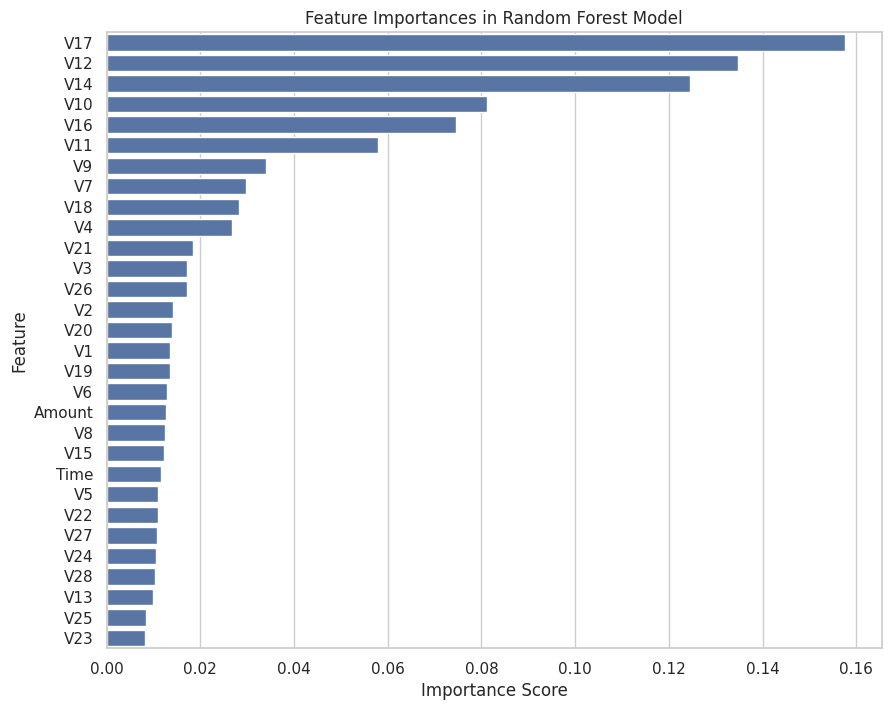

Feature Ranking:
1. feature V17 (0.1575)
2. feature V12 (0.1348)
3. feature V14 (0.1246)
4. feature V10 (0.0812)
5. feature V16 (0.0746)
6. feature V11 (0.0579)
7. feature V9 (0.0340)
8. feature V7 (0.0298)
9. feature V18 (0.0283)
10. feature V4 (0.0268)
11. feature V21 (0.0185)
12. feature V3 (0.0172)
13. feature V26 (0.0171)
14. feature V2 (0.0143)
15. feature V20 (0.0140)
16. feature V1 (0.0136)
17. feature V19 (0.0135)
18. feature V6 (0.0128)
19. feature Amount (0.0127)
20. feature V8 (0.0126)
21. feature V15 (0.0122)
22. feature Time (0.0116)
23. feature V5 (0.0110)
24. feature V22 (0.0109)
25. feature V27 (0.0108)
26. feature V24 (0.0106)
27. feature V28 (0.0104)
28. feature V13 (0.0099)
29. feature V25 (0.0084)
30. feature V23 (0.0083)


In [7]:
import matplotlib.pyplot as plt

# Extracting feature importances
feature_importances = rf_model.feature_importances_

# Creating a DataFrame to hold feature names and their importance scores
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sorting the DataFrame based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


# Extract feature importances and sort them
sorted_indices = np.argsort(rf_model.feature_importances_)[::-1]

print("Feature Ranking:")
for i in range(X.shape[1]):
    print(f"{i+1}. feature {X.columns[sorted_indices[i]]} ({rf_model.feature_importances_[sorted_indices[i]]:.4f})")


## 9. Optimizing with GPU-Enabled XGBoost Classifier

In our pursuit of enhancing the model's performance for fraud detection, we turn to XGBoost, an advanced and highly efficient implementation of gradient boosting. XGBoost stands out for its ability to handle large datasets and complex features with speed and accuracy. To further capitalize on its performance, we employ GPU acceleration, which significantly reduces training time without compromising the model's accuracy.

### Advantages of GPU-Enabled XGBoost:
- **Speed**: GPU acceleration allows XGBoost to train models much faster than CPU-based training, especially beneficial for large datasets.
- **Scalability**: XGBoost efficiently scales to handle vast amounts of data, making it ideal for our fraud detection task with numerous features.
- **Performance**: XGBoost has an excellent track record of winning machine learning competitions due to its high performance and flexibility.

### Hyperparameter Optimization with Random Grid Search:
To optimize our GPU-enabled XGBoost classifier, we'll employ Random Grid Search. This method randomly samples from a distribution of hyperparameters, enabling us to identify the most effective model configurations without exhaustive searching. We'll focus on tuning key hyperparameters that influence model performance, including:
- `n_estimators`: Number of gradient boosted trees. Equivalent to the number of boosting rounds.
- `max_depth`: Maximum tree depth for base learners.
- `learning_rate`: Boosting learning rate (also known as `eta`).
- `subsample`: Subsample ratio of the training instances.
- `colsample_bytree`: Subsample ratio of columns when constructing each tree.

By fine-tuning these parameters, we aim to build a highly accurate and efficient model capable of detecting fraudulent transactions with greater precision.

In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'device': ['cuda']  # Ensure to use GPU
}

# Initialize the XGBClassifier
xgb = XGBClassifier(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)

# Fit to the training data
random_search.fit(X_train, y_train)

# Best model
best_xgb = random_search.best_estimator_

# Evaluation
y_pred_best = best_xgb.predict(X_test)
y_pred_proba_best = best_xgb.predict_proba(X_test)[:, 1]

# Display the best parameters and model performance
print("Best parameters:", random_search.best_params_)
print("\nOptimized Model Classification Report:\n", classification_report(y_test, y_pred_best))
print("Optimized Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

# AUPRC
precision_best, recall_best, _ = precision_recall_curve(y_test, y_pred_proba_best)
auprc_best = auc(recall_best, precision_best)
print(f"Optimized Model AUPRC: {auprc_best:.4f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:23:25] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Best parameters: {'colsample_bytree': 0.7468055921327309, 'device': 'cuda', 'learning_rate': 0.05679835610086079, 'max_depth': 5, 'n_estimators': 558, 'subsample': 0.9598528437324805}

Optimized Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Optimized Model Confusion Matrix:
 [[56862     2]
 [   21    77]]
Optimized Model AUPRC: 0.8938


### Hyperparameter Optimization with Random Grid Search and Out-of-Bag Error:

### Out-of-Bag Error Estimation
To ensure the stability and robustness of our Random Forest model, we utilize the Out-of-Bag (OOB) error estimate. This estimate serves as an internal cross-validation mechanism, where each tree in the forest is trained on a different bootstrap sample from the data. The OOB error is calculated using only those cases that were not included in the bootstrap sample (the "out-of-bag" samples) for each tree.

### Advantages of OOB Error:
- **Internal Validation**: OOB error provides an unbiased estimate of the model error rate without the need for a separate validation set.
- **Efficiency**: It makes efficient use of data, as no data is set aside for validation; all data is used for both training and validating the model.
- **Performance Indicator**: It offers a quick glimpse into the model's potential performance on unseen data, helping in assessing the model's stability and robustness.

By evaluating the OOB error, we can gain insights into how our model might perform in a real-world scenario without further splitting the dataset or performing external cross-validation. In this version we will use the same random search as before but with OOB error

In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


# Define the parameter grid
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'device': ['cuda'],  # Ensure to use GPU
    'oob_score': [True]
}

# Initialize the XGBClassifier
xgb = XGBClassifier(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)

# Fit to the training data
random_search.fit(X_train, y_train)

# Best model
best_xgb = random_search.best_estimator_

# Evaluation
y_pred_best = best_xgb.predict(X_test)
y_pred_proba_best = best_xgb.predict_proba(X_test)[:, 1]

# Display the best parameters and model performance
print("Best parameters:", random_search.best_params_)
print("\nOptimized Model Classification Report:\n", classification_report(y_test, y_pred_best))
print("Optimized Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

# AUPRC
precision_best, recall_best, _ = precision_recall_curve(y_test, y_pred_proba_best)
auprc_best = auc(recall_best, precision_best)
print(f"Optimized Model AUPRC: {auprc_best:.4f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:24:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "oob_score" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'colsample_bytree': 0.7468055921327309, 'device': 'cuda', 'learning_rate': 0.05679835610086079, 'max_depth': 5, 'n_estimators': 558, 'oob_score': True, 'subsample': 0.9598528437324805}

Optimized Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Optimized Model Confusion Matrix:
 [[56862     2]
 [   21    77]]
Optimized Model AUPRC: 0.8938


## 12. Model Interpretability and Visualization: Partial Dependence Plots (PDP)

Partial Dependence Plots (PDPs) provide a graphical depiction of the marginal effect of a variable on the predicted outcome of a model, holding all other variables constant. By applying PDPs to the PCA-transformed features in our model, we can explore how changes in these features affect the probability of detecting fraud.

### Benefits of PDPs:
- **Insightful**: Shows the influence of single or pairs of features on the predicted outcome.
- **Non-linear Patterns**: Helps in capturing non-linear dependencies between features and the target.
- **Broad Applicability**: Useful for any model as they depend only on the model outputs and feature values.

PDPs are instrumental in demystifying the black-box nature of complex models, especially those involving PCA features.

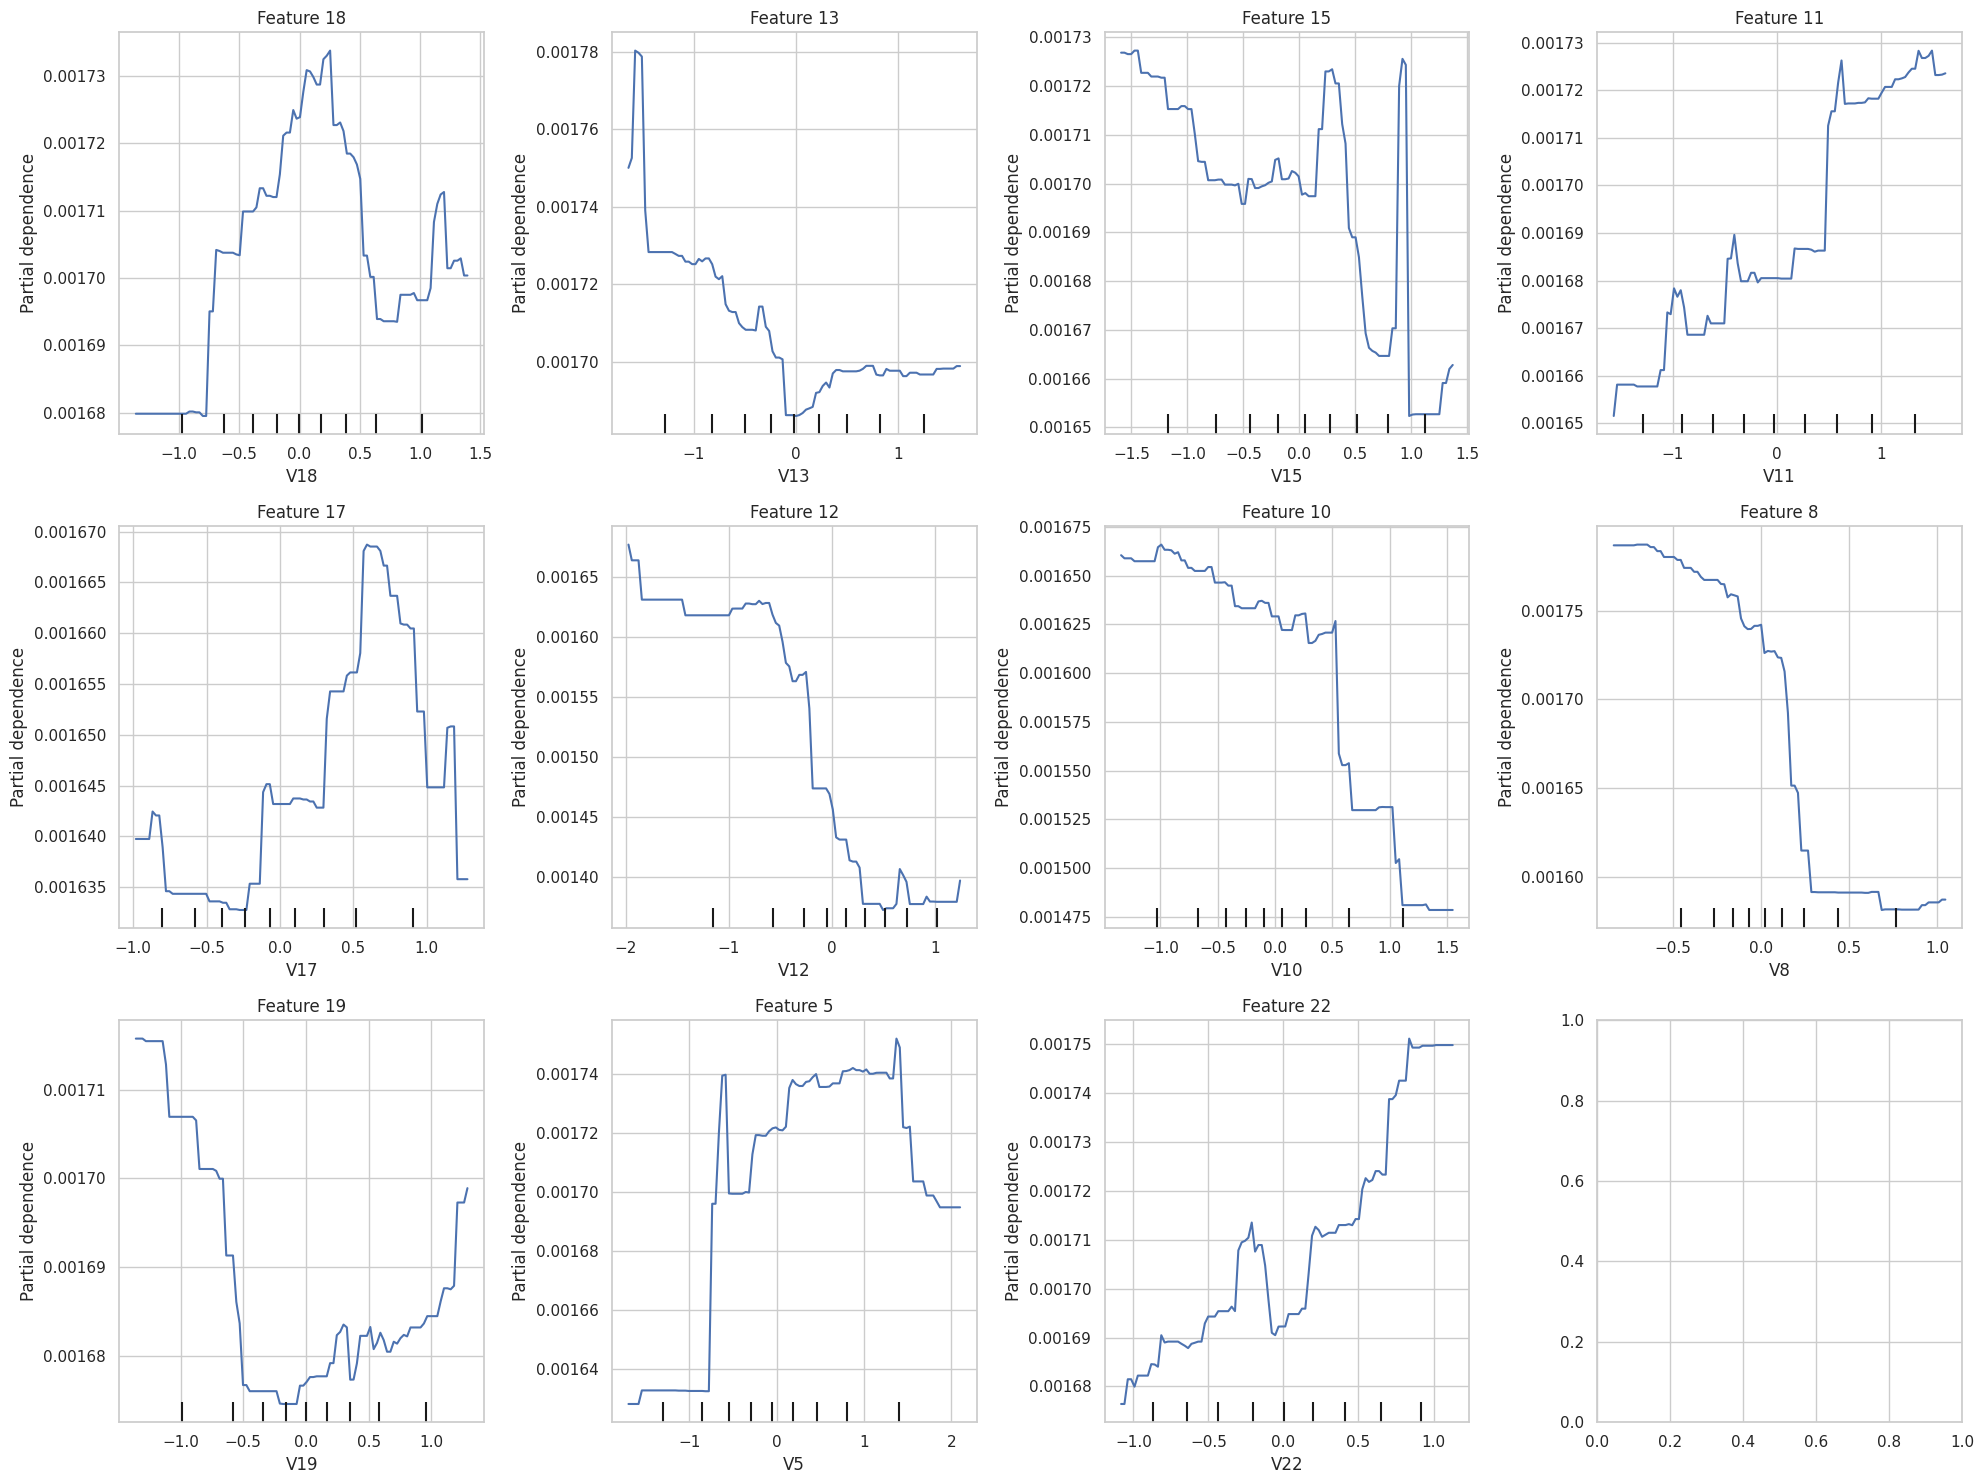

In [10]:
from sklearn.inspection import PartialDependenceDisplay

# Assuming 'best_xgb' is your trained and optimized XGBoost model
features = [18, 13, 15, 11, 17, 12, 10, 8, 19, 5, 22]  # Example indices of features you want to inspect

# Setup the figure and axes for a grid of plots
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))  # Adjust the number of rows and columns as needed
ax = ax.flatten()  # Flatten the axes array for easier indexing

# Generate the partial dependence plots
for i, feature in enumerate(features):
    PartialDependenceDisplay.from_estimator(best_xgb, X_train, features=[feature], ax=ax[i])
    ax[i].set_title(f'Feature {feature}')  # Set title to denote feature number or name

# Adjust layout to prevent overlap
fig.tight_layout()
plt.show()